In [1]:
import sys
import os
sys.path.append('D:\桌面\pytest\VAE学习及示例')

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from data_prepare import dataset,data_vision
from train import fit
from model import Base_VAE
from torch.nn import functional as F

In [3]:
import argparse
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset_name', type=str, default='minst', help='the name of dataset, minst or cifar')
    parser.add_argument('--seed', type=int, default=23, help='seed for random')
    parser.add_argument('--data_path', type=str, default=r'D:\桌面\pytest\VAE学习及示例\data', help='the data_path')
    parser.add_argument('--batch_size', type=int, default=65, help='the batch size')
    parser.add_argument('--latent_dim', type=int, default=100, help='the latent_dim')
    parser.add_argument('--epochs', type=int, default=20, help='the epochs')
    parser.add_argument('--lr', type=float, default=0.001, help='the epochs')
    opt = parser.parse_args(args=[])

    return opt
args = parse_args()  

In [4]:
train_dl, test_dl = dataset.get_dataset(args)
a,b = next(iter(test_dl))

113333
minst
111


torch.Size([65, 1, 32, 32])


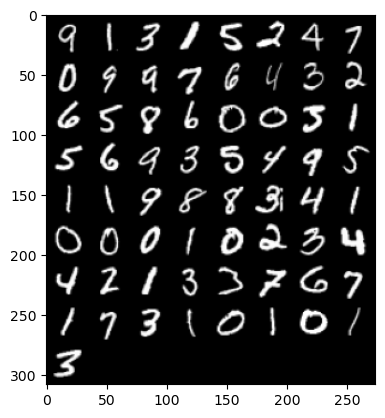

标签:  9 1 3 1 5 2 4 7 0 9 9 7 6 4 3 2 6 5 8 6 0 0 3 1 5 6 9 3 5 4 9 5 1 1 9 8 8 3 4 1 0 0 0 1 0 2 3 4 4 2 1 3 3 7 6 7 1 7 3 1 0 1 0 1 3


In [5]:
data_vision.pre_visualization(train_dl,test_dl,args)

In [6]:
model = Base_VAE(args).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

In [7]:
from torchsummary import summary
import torchvision.models as models

summary(model, input_size=(1,32,32), batch_size=7, device='cuda')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [7, 16, 16, 16]             160
       BatchNorm2d-2            [7, 16, 16, 16]              32
         LeakyReLU-3            [7, 16, 16, 16]               0
            Conv2d-4              [7, 32, 8, 8]           4,640
       BatchNorm2d-5              [7, 32, 8, 8]              64
         LeakyReLU-6              [7, 32, 8, 8]               0
            Conv2d-7              [7, 16, 4, 4]           4,624
       BatchNorm2d-8              [7, 16, 4, 4]              32
         LeakyReLU-9              [7, 16, 4, 4]               0
           Conv2d-10               [7, 8, 2, 2]           1,160
      BatchNorm2d-11               [7, 8, 2, 2]              16
        LeakyReLU-12               [7, 8, 2, 2]               0
           Linear-13                   [7, 100]           3,300
           Linear-14                   

In [9]:
epochs=10
train_loss = []
train_acc = []
test_loss = []
test_acc = []
# fit(epoch, model, trainloader, testloader, opt)
for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model, 
                                                                 train_dl, 
                                                                 test_dl, 
                                                                 optimizer)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)


epoch:  1 loss:  183060.14 accuracy: 0.75 test_loss:  96477.151 test_accuracy: 0.927
epoch:  2 loss:  80973.679 accuracy: 0.927 test_loss:  76062.086 test_accuracy: 0.961
epoch:  3 loss:  67161.039 accuracy: 0.947 test_loss:  58802.633 test_accuracy: 0.968
epoch:  4 loss:  59373.079 accuracy: 0.957 test_loss:  52113.266 test_accuracy: 0.968
epoch:  5 loss:  54297.293 accuracy: 0.961 test_loss:  51586.964 test_accuracy: 0.973
epoch:  6 loss:  50292.284 accuracy: 0.965 test_loss:  47221.016 test_accuracy: 0.978
epoch:  7 loss:  47943.409 accuracy: 0.969 test_loss:  46267.136 test_accuracy: 0.978
epoch:  8 loss:  45829.609 accuracy: 0.97 test_loss:  40884.383 test_accuracy: 0.978
epoch:  9 loss:  44274.67 accuracy: 0.972 test_loss:  41837.592 test_accuracy: 0.981
epoch:  10 loss:  42999.696 accuracy: 0.972 test_loss:  39491.204 test_accuracy: 0.98


In [8]:
# torch.save(model.state_dict(), 'model.pth')
# model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

tensor([7, 9, 4, 6, 6, 3, 2, 1, 7, 1])


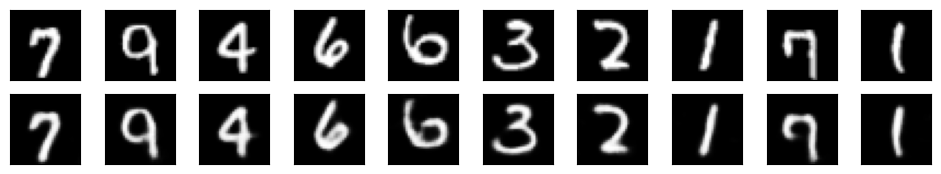

In [11]:
# data_vision.cifar_after_train_see(model, test_dl, args)
data_vision.minst_VAE_after_train_see(model.cuda(), test_dl, args)